### adult income prediction

In [1]:
# AIM-predicting whether the man will make 50k$ or not using census data

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.shape

(32561, 15)

In [7]:
df.size

488415

In [8]:
df.drop(['relationship'],axis=1,inplace=True)

In [9]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
import numpy as np

In [12]:
df=df.replace('?',np.nan)

In [13]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [2]:
#df['workclass'].value_counts()

In [15]:
df['workclass']=df['workclass'].fillna('Private')

In [3]:
#df['occupation'].value_counts()

In [17]:
df['occupation']=df['occupation'].fillna('Other-service')

In [4]:
#df['native.country'].value_counts()

In [19]:
df['native.country']=df['native.country'].fillna('United-States')

In [20]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [21]:
df['income']=df['income'].replace({'<=50K':0,'>50K':1})

In [22]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Other-service,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Other-service,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,0,3900,40,United-States,0


In [23]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [24]:
educational_df=pd.DataFrame({'education':df['education'].unique(),'education_no':df['education.num'].unique()})

In [25]:
educational_df.sort_values('education_no',ascending=True)

,education,education_no
15,Preschool,1
11,1st-4th,2
12,5th-6th,3
2,7th-8th,4
14,9th,5
3,10th,6
8,11th,7
13,12th,8
0,HS-grad,9
1,Some-college,10


In [26]:
df1=df.drop(['education'],axis=1)

In [27]:
for cols in df.columns:
    if df[cols].dtype!='object':
        corr=df[cols].corr(df['income'])
        print(f'{cols} has correlaltion with income as {corr}')
    

age has correlaltion with income as 0.2340371026488572
fnlwgt has correlaltion with income as -0.009462557247529193
education.num has correlaltion with income as 0.3351539526909414
capital.gain has correlaltion with income as 0.2233288181953817
capital.loss has correlaltion with income as 0.15052631177035317
hours.per.week has correlaltion with income as 0.22968906567080935
income has correlaltion with income as 1.0


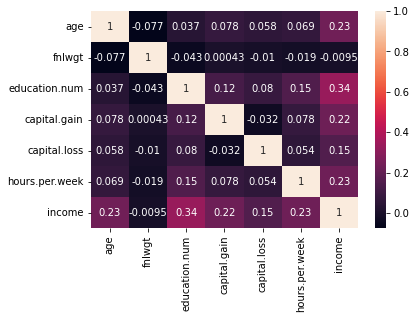

In [28]:
import seaborn as sns
sns.heatmap(df.corr(),annot = True);

In [29]:
# hence from corrleation we can drop fnlwgt

In [30]:
df.drop(['fnlwgt'],axis=1,inplace=True)

In [1]:
#df1['education.num'].value_counts()

In [32]:
df1=df.drop(['income'],axis=1)

In [35]:
import matplotlib.pyplot as plt

In [36]:
import seaborn as sns

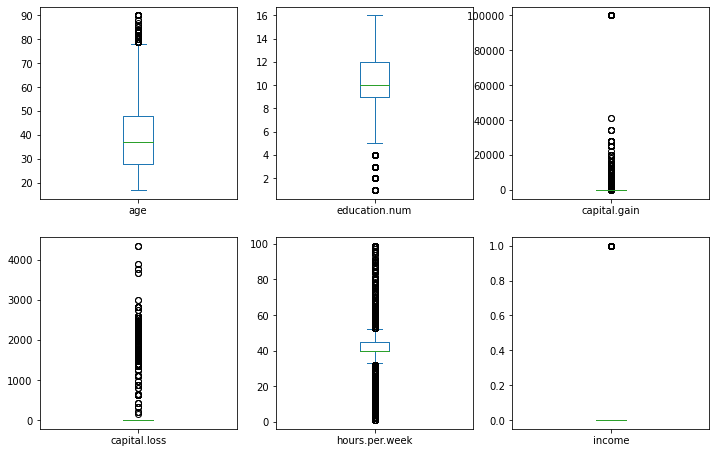

In [37]:
df.plot(kind='box',figsize=(12,12), layout=(3,3),subplots=True);

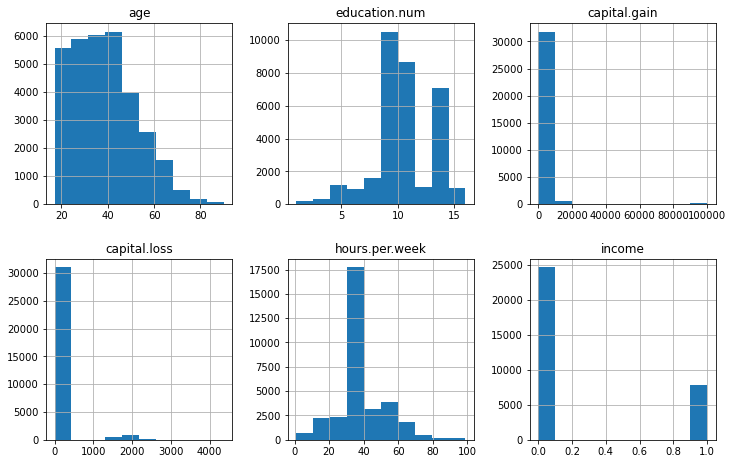

In [38]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False);

In [39]:
df1['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital.gain, Length: 119, dtype: int64

In [40]:
df1=df.drop(['income'],axis=1)

In [41]:
cols_list=['age','capital.gain','capital.loss','hours.per.week']

In [42]:
for cols in df1.columns:
    if df1[cols].dtype!='object' and cols in cols_list:
        q1=df1[cols].quantile(0.25)
        q3=df1[cols].quantile(0.75)
        q2=q3-q1
        low=q1-(1.5*q2)
        high=q3+(1.5*q2)
        (df1.loc[(df1[cols]<low) | (df1[cols]>high),cols])=df1[cols].median()

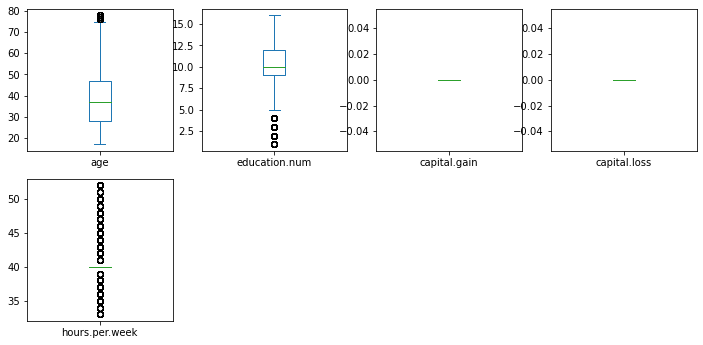

In [43]:
df1.plot(kind='box',figsize=(12,12), layout=(4,4),subplots=True);

In [44]:
# ho= there is no relation between given feature with dependent variable
# ha= there is relation between given feature with dependent variable

In [45]:
for cols in df1.columns:
    from scipy.stats import chi2_contingency
    chi_df=pd.crosstab(df1[cols],df['income'])
    a,p_value,b,c=chi2_contingency(chi_df)
    if p_value > 0.05:
        print(f'{cols} has p_value of {p_value}')

capital.gain has p_value of 1.0
capital.loss has p_value of 1.0


In [46]:
df1.drop(['capital.gain','capital.loss'],axis=1,inplace=True)

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()

In [49]:
for cols in df1.columns:
    if df1[cols].dtype=='object':
        df1[cols]=le.fit_transform(df1[cols])

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
std=StandardScaler()

In [52]:
std_df=std.fit_transform(df1)

In [53]:
std_df=pd.DataFrame(std_df)

In [54]:
std_df.columns=df1.iloc[:,:].columns

In [55]:
a=list(df['education'].unique())

In [56]:
b=df['education'].value_counts()

In [57]:
c=[]
for i in b:
    c.append(i)

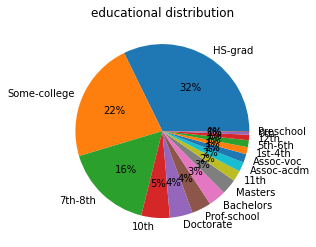

In [58]:
import matplotlib.pyplot as plt

x = c
labels =a
Fig, ax = plt.subplots()
ax.pie(x, labels = labels, autopct='%.0f%%')
ax.set_title('educational distribution')
plt.show()

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


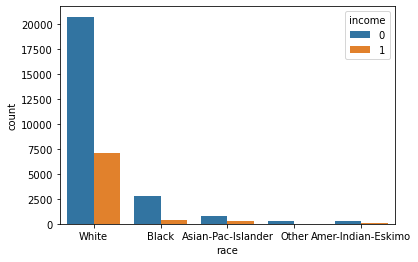

In [59]:
sns.countplot(df['race'], hue='income', data=df,);

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


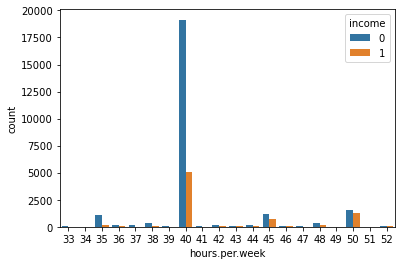

In [60]:
a=sns.countplot(df1['hours.per.week'], hue='income', data=df);


(array([   67.,  1517.,   625., 24263.,   255.,   363.,  1906.,   566.,
         2848.,   151.]),
 array([33. , 34.9, 36.8, 38.7, 40.6, 42.5, 44.4, 46.3, 48.2, 50.1, 52. ]),
 <BarContainer object of 10 artists>)

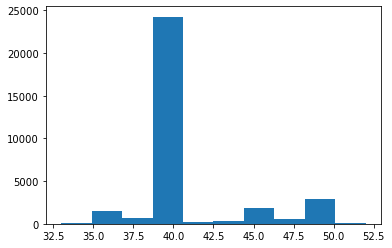

In [61]:
plt.hist(df1['hours.per.week'])

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


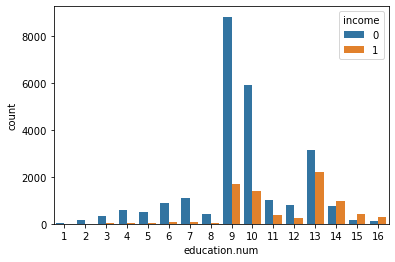

In [62]:
sns.countplot(df1['education.num'], hue='income', data=df);

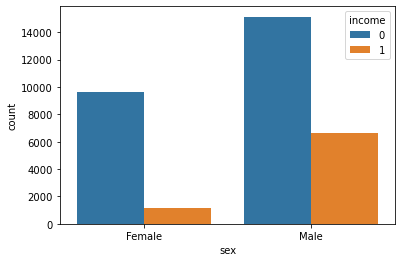

In [63]:
import seaborn as sns
ax = sns.countplot(x="sex", hue='income', data=df)

In [64]:
final_df=pd.concat([std_df,df['income']],axis=1)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_stratified = final_df.iloc[:,:-1]
y_stratified = final_df.iloc[:,[-1]]

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_stratified,y_stratified,train_size=0.8,stratify=y_stratified,random_state=0)

In [68]:
#train_df,test_df=train_test_split(final_df,train_size=0.8)

In [69]:
#a=train_df[train_df['income']==1]

In [70]:
a

<AxesSubplot:xlabel='hours.per.week', ylabel='count'>

In [71]:
#train_df=pd.concat([train_df,a,a])

In [72]:
#train_df['income'].value_counts()

In [73]:
#x_train=train_df.iloc[:,:-1]
#y_train=train_df.iloc[:,[-1]]
#x_test=test_df.iloc[:,:-1]
#y_test=test_df.iloc[:,[-1]]

In [74]:
y_train.income.value_counts()

0    19775
1     6273
Name: income, dtype: int64

In [75]:
19775/6273

3.152399171050534

In [76]:
y_test['income'].value_counts()

0    4945
1    1568
Name: income, dtype: int64

In [77]:
4945/1568

3.153698979591837

### here we have succesfully applied stratified sampling 

In [79]:
y_train=np.ravel(y_train,order='C')

### applying logistic regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr=LogisticRegression(random_state=32)

In [83]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=32)

In [84]:
y_test_pred=lr.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(y_test,y_test_pred)

array([[4616,  329],
       [ 945,  623]], dtype=int64)

In [87]:
from sklearn import metrics

In [88]:
metrics.accuracy_score(y_test,y_test_pred)

0.8043912175648703

In [89]:
metrics.precision_score(y_test,y_test_pred)

0.6544117647058824

In [90]:
### hyperparamertunning in logistic regression

In [91]:
lr_grid={'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty':['elasticnet', 'l1', 'l2']  }

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
grid_lr=GridSearchCV(lr,lr_grid)

In [94]:
grid_lr.fit(x_train,y_train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Value

GridSearchCV(estimator=LogisticRegression(random_state=32),
             param_grid={'penalty': ['elasticnet', 'l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [95]:
grid_lr.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

In [96]:
LR=LogisticRegression(penalty='l2',solver='newton-cg',random_state=42)

In [97]:
LR.fit(x_train,y_train)

LogisticRegression(random_state=42, solver='newton-cg')

In [98]:
y_test_LR=LR.predict(x_test)

In [99]:
confusion_matrix(y_test,y_test_LR)

array([[4616,  329],
       [ 945,  623]], dtype=int64)

In [100]:
print(metrics.accuracy_score(y_test,y_test_LR))
print(metrics.precision_score(y_test,y_test_LR))


0.8043912175648703
0.6544117647058824


In [101]:
subjctivity=317/(317+4628)

## applying knn

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn=KNeighborsClassifier()

In [104]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [105]:
y_pred_knn=knn.predict(x_test)

In [106]:
confusion_matrix(y_test,y_pred_knn)

array([[4394,  551],
       [ 671,  897]], dtype=int64)

In [107]:
metrics.accuracy_score(y_test,y_pred_knn)

0.812375249500998

In [108]:
metrics.precision_score(y_test,y_pred_knn)

0.619475138121547

### cross validation of Knn

In [110]:
parameter_dict={'n_neighbors':list(range(21,50,2)),'p':[1,2],
    'metric':['minkowski','manhattan_distance','euclidean_distance'],'weights' : ['uniform', 'distance']}

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
grid_df=GridSearchCV(knn,param_grid=parameter_dict)

In [113]:
import numpy as np

In [114]:
grid_df.fit(x_train,y_train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\Shree\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Shree\anaconda3\lib\sit

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan_distance',
                                    'euclidean_distance'],
                         'n_neighbors': [21, 23, 25, 27, 29, 31, 33, 35, 37, 39,
                                         41, 43, 45, 47, 49],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [115]:
grid_df.best_params_

{'metric': 'minkowski', 'n_neighbors': 45, 'p': 1, 'weights': 'uniform'}

In [116]:
knn=KNeighborsClassifier(metric= 'minkowski', n_neighbors= 45, p=1, weights= 'uniform')

In [117]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=45, p=1)

In [118]:
y_pred_tunned_knn=knn.predict(x_test)

In [119]:
confusion_matrix(y_test,y_pred_tunned_knn)

array([[4503,  442],
       [ 675,  893]], dtype=int64)

In [120]:
metrics.accuracy_score(y_test,y_pred_tunned_knn)

0.8284968524489482

In [121]:
metrics.precision_score(y_test,y_pred_tunned_knn)

0.6689138576779026

In [15]:
fpr_ratio=442/(442+4503)

In [16]:
fpr_ratio

0.08938321536905966

### applying dicision tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
dt=DecisionTreeClassifier()

In [126]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [127]:
y_pred_dt=dt.predict(x_test)

In [128]:
confusion_matrix(y_test,y_pred_dt)

array([[4296,  649],
       [ 760,  808]], dtype=int64)

In [129]:
metrics.accuracy_score(y_test,y_pred_dt)

0.7836634423460771

In [130]:
metrics.precision_score(y_test,y_pred_dt)

0.5545641729581332

In [5]:
fpr_score=649/(649+4296)

In [6]:
fpr_score

0.13124368048533872

In [10]:
tpr_score=808/(808+760)

In [11]:
tpr_score

0.5153061224489796

### hyper-parameter tunning for dicision tree

In [134]:
parameter_dict={'criterion':['gini','entropy'],'max_depth':list(range(1,50,5)),
    'min_samples_split':[2,3,4,5,6,7],
     'min_samples_leaf':[1,2,3,4]}

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
grid_model=GridSearchCV(dt,param_grid=parameter_dict)

In [137]:
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [138]:
grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 4,
 'min_samples_split': 6}

In [139]:
dt_grid=dt=DecisionTreeClassifier(criterion= 'entropy', max_depth=11, min_samples_split=4,min_samples_leaf= 7,random_state=42)

In [140]:
dt_grid.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=7,
                       min_samples_split=4, random_state=42)

In [141]:
y_pred_dt_grid=dt_grid.predict(x_test)

In [142]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred_dt_grid)

array([[4537,  408],
       [ 705,  863]], dtype=int64)

In [143]:
metrics.accuracy_score(y_test,y_pred_dt_grid)

0.8291110087517273

In [144]:
metrics.precision_score(y_test,y_pred_dt_grid)

0.6789929189614476

In [145]:
metrics.recall_score(y_test,y_pred_dt_grid)

0.5503826530612245

In [146]:
408/(408+4537)

0.08250758341759352

In [147]:
metrics.roc_auc_score(y_test,y_pred_dt_grid)

0.7339375348218155

### feature selection

In [148]:
from sklearn.feature_selection import SequentialFeatureSelector

In [149]:
fetured_df=pd.DataFrame({'features':x_train.columns,'importance':dt.feature_importances_})

In [150]:
fetured_df.sort_values(by='importance',ascending=False)

,features,importance
4,marital.status,0.443440
3,education.num,0.266042
0,age,0.132066
5,occupation,0.062674
8,hours.per.week,0.031534
1,workclass,0.024541
7,sex,0.015249
2,education,0.010112
6,race,0.008221
9,native.country,0.006122


### applying random forest

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
rf=RandomForestClassifier()

In [153]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [154]:
y_pred_rf=rf.predict(x_test)

In [155]:
confusion_matrix(y_test,y_pred_rf)

array([[4415,  530],
       [ 689,  879]], dtype=int64)

In [156]:
metrics.accuracy_score(y_test,y_pred_rf)

0.8128358667280823

In [157]:
metrics.precision_score(y_test,y_pred_rf)

0.6238466997870831

In [158]:
metrics.recall_score(y_test,y_pred_rf)

0.5605867346938775

In [159]:
fpr_ratio=524/(524+4421)

In [160]:
fpr_ratio

0.10596562184024266

## hyperparameter tunning for randomforest classifier

In [161]:
parameter_dict={'n_estimators':list(range(1,100,20))},
    #'criterion':['gini','entropy'],
    #'max_depth':list(range(1,51,10))}
    #'min_samples_split':list(range(1,10,2)),
    #'min_samples_leaf':[]
    

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
rf_grid=GridSearchCV(rf,param_grid=parameter_dict)

In [164]:
#rf_grid.fit(x_train,y_train)

In [165]:
#rf_grid.best_params_

In [166]:
rf=RandomForestClassifier(n_estimators=95,criterion='entropy', max_depth=31, min_samples_split= 4,min_samples_leaf= 7)

In [167]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=31, min_samples_leaf=7,
                       min_samples_split=4, n_estimators=95)

In [168]:
y_pred_rf=rf.predict(x_test)

In [169]:
metrics.confusion_matrix(y_test,y_pred_rf)

array([[4547,  398],
       [ 650,  918]], dtype=int64)

In [170]:
metrics.accuracy_score(y_test,y_pred_rf)

0.839091048671887

In [171]:
metrics.recall_score(y_test,y_pred_rf)

0.5854591836734694

In [37]:
389/(389+4547)

0.07880875202593193

In [173]:
metrics.precision_score(y_test,y_pred_rf)

0.6975683890577508

In [174]:
metrics.recall_score(y_test,y_pred_rf)

0.5854591836734694

### applying bagging-classifier

from sklearn.ensemble import BaggingClassifier

In [176]:
bg=BaggingClassifier()

In [177]:
bg.fit(x_train,y_train)

BaggingClassifier()

In [178]:
y_pred_bagg=bg.predict(x_test)

In [179]:
confusion_matrix(y_test,y_pred_bagg)

array([[4409,  536],
       [ 724,  844]], dtype=int64)

In [180]:
metrics.accuracy_score(y_test,y_pred_bagg)

0.806540764624597

In [181]:
metrics.recall_score(y_test,y_pred_bagg)

0.5382653061224489

In [182]:
metrics.precision_score(y_test,y_pred_bagg)

0.6115942028985507

In [183]:
fpr_ratio=686/(686+4239)

In [184]:
fpr_ratio

0.13928934010152283

In [185]:
metrics.recall_score(y_test,y_pred_bagg)

0.5382653061224489

### hyperparametertunning of bagging classifier

In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
param_grid_bagging={'n_estimators':list(range(1,100,10))}

In [188]:
grid_model=GridSearchCV(bg,param_grid_bagging)

In [189]:
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91]})

In [190]:
grid_model.best_params_

{'n_estimators': 81}

In [191]:
from sklearn.ensemble import BaggingClassifier

In [192]:
bg=BaggingClassifier(n_estimators=51,bootstrap=True,oob_score=True)

In [193]:
bg.fit(x_train,y_train)

BaggingClassifier(n_estimators=51, oob_score=True)

In [194]:
y_test_pred=bg.predict(x_test)

In [195]:
confusion_matrix(y_test,y_test_pred)

array([[4382,  563],
       [ 681,  887]], dtype=int64)

In [196]:
metrics.accuracy_score(y_test,y_test_pred)

0.8089973898357132

### applying svm

In [198]:
from sklearn.svm import SVC

In [199]:
svm=SVC()

In [200]:
svm_param={'degree':[2]}

In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
svm_grid=GridSearchCV(svm,param_grid=svm_param)

In [203]:
svm_grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'degree': [2]})

In [204]:
svm_grid.best_params_

{'degree': 2}

In [207]:
SVM=SVC(degree=2)

In [208]:
SVM.fit(x_train,y_train)

SVC(degree=2)

In [209]:
y_pred_svm=SVM.predict(x_test)

In [210]:
confusion_matrix(y_test,y_pred_svm)

array([[4618,  327],
       [ 839,  729]], dtype=int64)

### applying naive-base model

In [211]:
from sklearn.naive_bayes import MultinomialNB

In [212]:
confusion_matrix(y_test,y_pred_svm)

array([[4618,  327],
       [ 839,  729]], dtype=int64)

### combinning weak learnners with voting classifier

In [215]:
lr=lr=LogisticRegression(penalty='l2',solver='newton-cg',random_state=42)
knn=KNeighborsClassifier(metric= 'minkowski', n_neighbors= 45, p=1, weights= 'uniform')
dt_grid=DecisionTreeClassifier(criterion= 'entropy', max_depth=11, min_samples_split= 5,min_samples_leaf= 7,random_state=42)
rf=RandomForestClassifier(n_estimators=95,criterion= 'entropy', max_depth= 11, min_samples_split= 5,min_samples_leaf= 4,random_state=42)
bg=BaggingClassifier( n_estimators=51,bootstrap=True,oob_score=True,random_state=42)
svm= SVC(degree=2)



In [216]:
from sklearn.ensemble import VotingClassifier

In [217]:
voting_clf=VotingClassifier([('lr',lr),('knn',knn),('dt',dt_grid),('rf',rf),('bg',bg),('svm',svm)],voting='hard',n_jobs=5)

In [218]:
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='newton-cg')),
                             ('knn', KNeighborsClassifier(n_neighbors=45, p=1)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=11,
                                                     min_samples_leaf=7,
                                                     min_samples_split=5,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=11,
                                                     min_samples_leaf=4,
                                                     min_samples_split=5,
                          

In [219]:
y_pred_voting_clf=voting_clf.predict(x_test)

In [220]:
confusion_matrix(y_test,y_pred_voting_clf)

array([[4641,  304],
       [ 809,  759]], dtype=int64)

In [221]:
metrics.accuracy_score(y_test,y_pred_voting_clf)

0.8291110087517273

In [222]:
metrics.recall_score(y_test,y_pred_voting_clf)

0.4840561224489796

In [223]:
metrics.precision_score(y_test,y_pred_voting_clf)

0.7140169332079022

### boosting 

In [225]:
from sklearn.ensemble import AdaBoostClassifier

In [226]:
model=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=25, random_state=42)

In [227]:
model.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=11,
                                                         min_samples_leaf=7,
                                                         min_samples_split=4,
                                                         random_state=42),
                   learning_rate=0.01, n_estimators=25, random_state=42)

In [228]:
y_pred_boosted=model.predict(x_test)

In [229]:
metrics.confusion_matrix(y_test,y_pred_boosted)

array([[4533,  412],
       [ 658,  910]], dtype=int64)

In [230]:
metrics.accuracy_score(y_test,y_pred_boosted)

0.8357131890066022

In [231]:
metrics.precision_score(y_test,y_pred_boosted)


0.6883509833585476

In [232]:
metrics.recall_score(y_test,y_pred_boosted)


0.5803571428571429

In [12]:
fpr_score=412/(412+4533)

In [14]:
fpr_score

0.0833164812942366

In [234]:
metrics.roc_auc_score(y_test,y_pred_boosted)

0.7485203307814531

In [8]:
### creating an usecase

In [9]:
# problem statement - goverment want to deploys new taxetion laws in favour of peoples earnning less than 50k$ using this sensus data
                      #  govermrnt is ok with someone with higher income paying lower tax goverment dont want one with earning less than 50k$ paying
                      # and still paying higher tax

In [ ]:
# AIM- to select model having good accuracy,lower fpr,better pricision

In [24]:
import pandas as pd
df=pd.DataFrame()

In [25]:
df['model_name']=['logistic-regression','KNN','dicision-tree','Random-Forest','bagging-classifier','SVM','votting-classifier','adboost technique']

In [26]:
df['Accuracy']=[80,81,78,81,80.6,82,82.9,81]

In [27]:
df['hyper_parameters']=[['Penalty = 12,Solver = Newton-cg'],['Metric = ‘ Minkowiski’n_neighbours = 15,weights = uniform,p = 1'],
                       ['Criterion = entropy','max_depth = 11','min_sample_split = 4','min_sample_leaf = 7'],['n_estimators = 95','criterion = entropy','max_depth = 3','min_sample_split = 4','min_sample_leaf = 7'],
                        ['n_estimator = 51','bootstrap = True','oob_score = True'],['Degree = 2'],['-'],['base_estimator = dt','lr = 0.01','n_estimator = 25']]

In [28]:
df['accuracy with hyper-parameter tunnung']=[80.4,82.8,82.9,83.90,80.8,82,82.9,83.57]

In [29]:
df

,model_name,Accuracy,hyper_parameters,accuracy with hyper-parameter tunnung
0,logistic-regression,80.0,"[Penalty = 12,Solver = Newton-cg]",80.40
1,KNN,81.0,"[Metric = ‘ Minkowiski’n_neighbours = 15,weigh...",82.80
2,dicision-tree,78.0,"[Criterion = entropy, max_depth = 11, min_samp...",82.90
3,Random-Forest,81.0,"[n_estimators = 95, criterion = entropy, max_d...",83.90
4,bagging-classifier,80.6,"[n_estimator = 51, bootstrap = True, oob_score...",80.80
5,SVM,82.0,[Degree = 2],82.00
6,votting-classifier,82.9,[-],82.90
7,adboost technique,81.0,"[base_estimator = dt, lr = 0.01, n_estimator =...",83.57


In [30]:
# but accuracy cannot be the final parameter to decide

In [32]:
# choosing top 3  performing models

In [35]:
df1=pd.DataFrame()

In [36]:
df1['name_of_model']=['Dicission tree','Random-forest','adboost-technique']

In [38]:
df1['Accuracy']=[82.9,83.9,83.5]
df1['FPR-ratio']=[8.2,7.8,8.3]
df1['precision']=[67.89,69.75,68.83]
df1['tpr-ratio']=[55.03,58.54,58.07]


In [39]:
df1

,name_of_model,Accuracy,FPR-ratio,precision,tpr-ratio
0,Dicission tree,82.9,8.2,67.89,55.03
1,Random-forest,83.9,7.8,69.75,58.54
2,adboost-technique,83.5,8.3,68.83,58.07


In [40]:
### considering our problem statement, random forest seems to performing best in all the senario